## Libraries & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import shuffle

In [2]:
# Display all the columns
pd.set_option('display.max_columns', None)

## Loading the data

In [3]:

df = pd.read_csv('data/taiwan/taiwan_bankruptcy.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

## Features
The columns will be assigned short names to ease the anaylsis. 

Then a dictionary will save the full names of the columns. 

Creating short names

In [4]:
features_names = ['Target']
# 1: to ignore the target column
for i in range(len(df.columns[1:])):
    features_names.append('F' + str(i+1))

features_names[90:96]

['F90', 'F91', 'F92', 'F93', 'F94', 'F95']

Saving columns names in a dictionary

In [5]:
features_dict = {}
for feature, colname in zip(features_names, df.columns):
    features_dict[feature] = colname

features_dict

{'Target': 'Bankrupt?',
 'F1': ' ROA(C) before interest and depreciation before interest',
 'F2': ' ROA(A) before interest and % after tax',
 'F3': ' ROA(B) before interest and depreciation after tax',
 'F4': ' Operating Gross Margin',
 'F5': ' Realized Sales Gross Margin',
 'F6': ' Operating Profit Rate',
 'F7': ' Pre-tax net Interest Rate',
 'F8': ' After-tax net Interest Rate',
 'F9': ' Non-industry income and expenditure/revenue',
 'F10': ' Continuous interest rate (after tax)',
 'F11': ' Operating Expense Rate',
 'F12': ' Research and development expense rate',
 'F13': ' Cash flow rate',
 'F14': ' Interest-bearing debt interest rate',
 'F15': ' Tax rate (A)',
 'F16': ' Net Value Per Share (B)',
 'F17': ' Net Value Per Share (A)',
 'F18': ' Net Value Per Share (C)',
 'F19': ' Persistent EPS in the Last Four Seasons',
 'F20': ' Cash Flow Per Share',
 'F21': ' Revenue Per Share (Yuan ¥)',
 'F22': ' Operating Profit Per Share (Yuan ¥)',
 'F23': ' Per Share Net profit before tax (Yuan 

Renaming the columns in  the dataframe

In [6]:
for feature in features_dict:
    df.rename(columns={features_dict[feature]: feature}, inplace=True)
    
df.columns

Index(['Target', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30',
       'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
       'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50',
       'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60',
       'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70',
       'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80',
       'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90',
       'F91', 'F92', 'F93', 'F94', 'F95'],
      dtype='object')

## EDA
Looking for empty values. 

In [7]:
df.shape

(6819, 96)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  6819 non-null   int64  
 1   F1      6819 non-null   float64
 2   F2      6819 non-null   float64
 3   F3      6819 non-null   float64
 4   F4      6819 non-null   float64
 5   F5      6819 non-null   float64
 6   F6      6819 non-null   float64
 7   F7      6819 non-null   float64
 8   F8      6819 non-null   float64
 9   F9      6819 non-null   float64
 10  F10     6819 non-null   float64
 11  F11     6819 non-null   float64
 12  F12     6819 non-null   float64
 13  F13     6819 non-null   float64
 14  F14     6819 non-null   float64
 15  F15     6819 non-null   float64
 16  F16     6819 non-null   float64
 17  F17     6819 non-null   float64
 18  F18     6819 non-null   float64
 19  F19     6819 non-null   float64
 20  F20     6819 non-null   float64
 21  F21     6819 non-null   float64
 22  

We have 96 columns with 0 non-null values. The data is pretty clean.

In [9]:
((df.isnull().sum()) == 0).sum()

96

In [10]:
df.select_dtypes(['number']).shape

(6819, 96)

In [11]:
df.describe()

,Target,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68,F69,F70,F71,F72,F73,F74,F75,F76,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92,F93,F94,F95
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,0.374654,0.005968,0.108977,0.182715,0.402459,0.141606,1.278971e+07,9.826221e+06,2.149106e+09,1.008596e+09,0.038595,2.325854e+06,0.400671,1.125579e+07,0.814125,0.400132,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,0.033390,0.033474,0.033480,0.033263,0.017611,5.170709e+07,0.027942,0.033180,0.012079,0.010752,0.013853,0.013910,0.010063,2.897718e+09,1.141594e+08,0.009634,0.020737,3.330216e+07,2.446847e+08,0.011238,1.684069e+08,0.053920,0.053920,0.028153,0.016286,0.012188,0.027782,0.030785,0.013324,0.101145,2.782598e+08,2.563589e+08,3.247967e+09,2.477557e+09,0.036680,1.366327e+08,0.032720,2.945063e+08,0.059054,0.201998,0.218112,0.139251,1.716209e+08,5.103509e+08,0.050290,0.035147,0.010469,5.820516e+08,0.206677,0.011678,0.013488,5.702706e+08,0.025564,0.012093,0.027149,2.821161e+09,3.374944e+09,0.008959,2.938623e+09,0.009341,1.007542e+08,0.206677,0.013488,0.019529,0.047372,0.029943,0.058561,0.012961,0.030845,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+

### Classes representation
The data is imbalanced since only 3.23% of the companies went bankrupt.

TODO: Balance the dataset

Bankruptcies: 3.226280 %


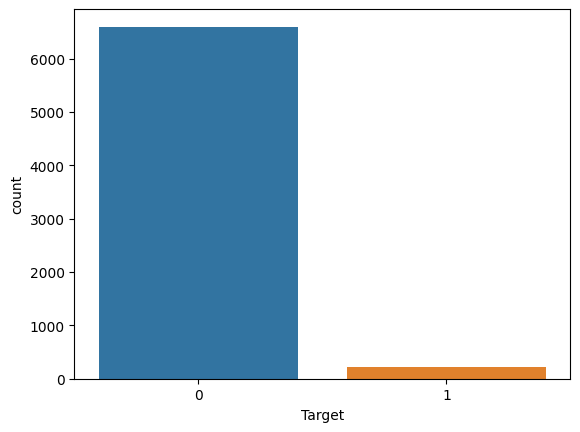

In [12]:
sns.countplot(x=df['Target'])
bankruptcies_ratio = round(df['Target'] == 1).sum() / len(df) * 100
print('Bankruptcies: %f %%'  %bankruptcies_ratio)

### Correlations
References: This Wikipedia Image helps understand the meaning of the correlation index.

![](images/Correlation_examples.svg "")

#### Correlation Matrix

In [13]:
df.corr()

,Target,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68,F69,F70,F71,F72,F73,F74,F75,F76,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92,F93,F94,F95
Target,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,0.176543,0.070455,-0.141111,-0.207857,0.075278,-0.067915,-0.004754,-0.006556,-0.001376,0.072818,0.021089,0.039718,-0.092842,0.002829,-0.193083,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
F1,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,-0.161671,-0.035729,0.685028,0.753339,-0.109888,0.210622,-0.033947,0.007019,-0.062660,-0.065919,0.022896,-0.014834,0.301996,-0.012543,0.259680,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
F2,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.531790,0.531821,0.764828,0.326239,-0.011829,0.654253,0.752578,0.003277,0.042208,0.125384,0.125872,0.024887,0.026977,-0.063970,0.081982,0.263615,0.014102,-0.018412,0.005440,-0.010323,-0.259972,0.259972,0.020707,-0.161868,-0.036183,0.651581,0.758234,-0.078585,0.223528,-0.031262,0.009041,-0.054496,-0.136964,0.036925,-0.014888,0.324942,-0.006035,0.303532,0.202017,0.157005,0.217918,-0.009612,-0.037468,-0.190501,0.351107,-0.000004,0.004864,0.080401,0.120403,-0.133816,0.022241,0.718013,0.028873,-0.357147,-0.000869,-0.025143,0.004491,-0.025817,0.012198,-0.005860,0.080401,-0.133816,-0.103015,0.263591,0.157065,0.443017,0.112929,-0.195673,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
F3,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,0.065602,0.102147,0.323040,0.045839,0.197344,0.502052,0.502000,0.501907,0.764597,0.366216,-0.014359,0.659834,0.722940,0.002142,0.036144,0.117130,0.117042,0.024414,0.022104,-0.026127,0.079972,0.292008,0.012975,-0.024232,0.005187,-0.021161,-0.264734,0.264734,0.003869,-0.158618,-0.034177,0.657274,0.726003,-0.109501,0.194810,-0.033768,0.009921,-0.053605,-0.061046,0.012763,-0.014545,0.304522,-0.012770,0.260151,0.166311,0.094083,0.227144,-0.010014,-0.041296,-0.217186,0.387893,-0.001616,0.007302,0.046694,0.101962,-0.142879,0.018300,0.673738,0.024436,-0.322223,-0.002611,-0.029928,0.002488,-0.030410,0.011977,-0.008364,0.046694,-0.142879,-0.083190,0.258428,0.157022,0.497042,0.123622,-0.162572,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
F4,-0.100043

#### Strongest correlations
Keeping features with a minimum correlation coefficant of 0.2.

In [14]:
# target correlations
print('-------------------------\n Target Correlations\n-------------------------') 
corr = df.corr().loc['Target']
print(corr.head())


print('-------------------------\n Most Important Features\n-------------------------') 
strong_corr = corr[(corr >= 0.2) | (corr <= -0.2)]
print(strong_corr)

-------------------------
 Target Correlations
-------------------------
Target    1.000000
F1       -0.260807
F2       -0.282941
F3       -0.273051
F4       -0.100043
Name: Target, dtype: float64
-------------------------
 Most Important Features
-------------------------
Target    1.000000
F1       -0.260807
F2       -0.282941
F3       -0.273051
F19      -0.219560
F23      -0.201395
F37       0.250161
F38      -0.250161
F43      -0.207857
F68      -0.217779
F86      -0.315457
Name: Target, dtype: float64


In [15]:
print('-------------------------\n Most Important Features\n-------------------------') 
for feature, corr in zip(strong_corr.index, strong_corr):
    print(features_dict[feature], ':', round(corr, 2))

-------------------------
 Most Important Features
-------------------------
Bankrupt? : 1.0
 ROA(C) before interest and depreciation before interest : -0.26
 ROA(A) before interest and % after tax : -0.28
 ROA(B) before interest and depreciation after tax : -0.27
 Persistent EPS in the Last Four Seasons : -0.22
 Per Share Net profit before tax (Yuan ¥) : -0.2
 Debt ratio % : 0.25
 Net worth/Assets : -0.25
 Net profit before tax/Paid-in capital : -0.21
 Retained Earnings to Total Assets : -0.22
 Net Income to Total Assets : -0.32


The Net Income to Total Assets seems to have the most impact on bankrupcty.

#### Heatmap of the Strongest Correlations 
Display the highest correlations on heatmap. We do so because a full heatmap would be hard to interpret.

In [16]:
# Get the index (position) of the correlated variables
indexes = [0]   # 0 for the target (1st column)
for index in strong_corr.index[1:]:
    indexes.append(int(index.split('F')[1]))
indexes

[0, 1, 2, 3, 19, 23, 37, 38, 43, 68, 86]

In [17]:
strong_corr_matrix = df.corr()[strong_corr.index].iloc[indexes, :]

<Axes: >

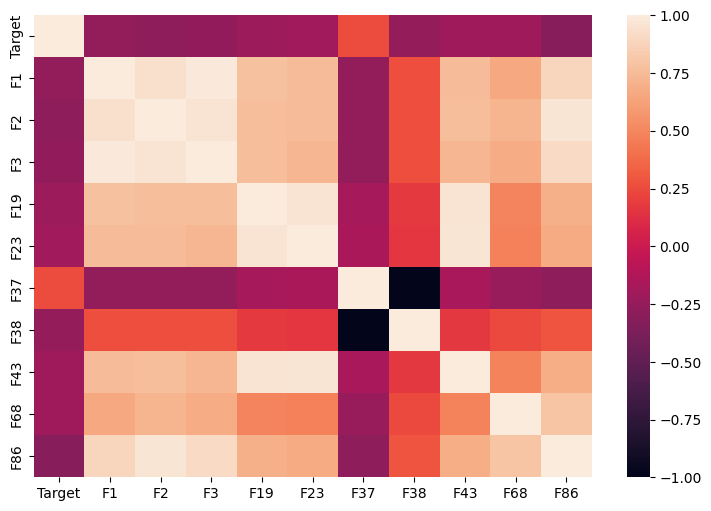

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(strong_corr_matrix)

#### Diagonal Heatmap

<Axes: >

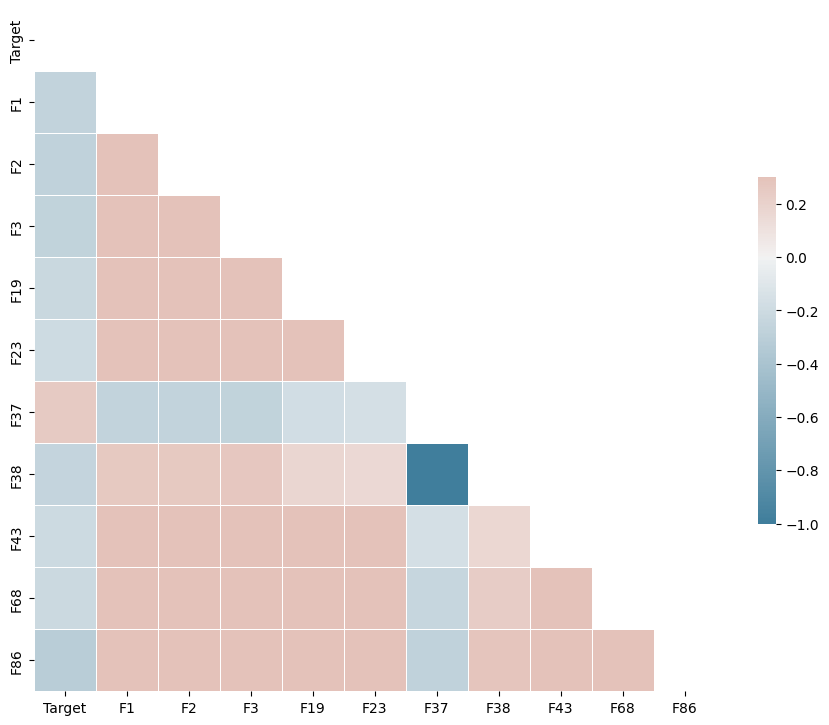

In [19]:
# get the upper triangle of the matrix to se it as a mask 
mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

# figure size
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(strong_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.corr()[strong_corr.index].iloc[indexes, :]

,Target,F1,F2,F3,F19,F23,F37,F38,F43,F68,F86
Target,1.000000,-0.260807,-0.282941,-0.273051,-0.219560,-0.201395,0.250161,-0.250161,-0.207857,-0.217779,-0.315457
F1,-0.260807,1.000000,0.940124,0.986849,0.775006,0.750564,-0.261427,0.261427,0.753339,0.650217,0.887670
F2,-0.282941,0.940124,1.000000,0.955741,0.764828,0.752578,-0.259972,0.259972,0.758234,0.718013,0.961552
F3,-0.273051,0.986849,0.955741,1.000000,0.764597,0.722940,-0.264734,0.264734,0.726003,0.673738,0.912040
F19,-0.219560,0.775006,0.764828,0.764597,1.000000,0.955591,-0.177429,0.177429,0.959461,0.492078,0.691152
F23,-0.201395,0.750564,0.752578,0.722940,0.955591,1.000000,-0.158897,0.158897,0.962723,0.473736,0.671748
F37,0.250161,-0.261427,-0.259972,-0.264734,-0.177429,-0.158897,1.000000,-1.000000,-0.164110,-0.235423,-0.281422
F38,-0.250161,0.261427,0.259972,0.264734,0.177429,0.158897,-1.000000,1.000000,0.164110,0.235423,0.281422
F43,-0.207857,0.753339,0.758234,0.726003,0.959461,0.962723,-0.164110,0.164110,1.000000,0.483355,0.683623
F68,-0.217779,0.650217,0.718013,0.673738,0.492078,0.473736,-0.235423,0.235423,0.483355,1.000000,0.794189


#### Scatter Matrix
We can see that some features are highly correlated: 

TODO: Remove F1, F3 - F2 - F86 are the strongest correlations
* F1 - F2 - F3
* F2 - F86
* F19 - F23 -  F43
* F2 - F86
* F38 - F37
* F23 - F43

In [27]:
for index in strong_corr.index:
    print(index, ':', features_dict[index])

Target : Bankrupt?
F1 :  ROA(C) before interest and depreciation before interest
F2 :  ROA(A) before interest and % after tax
F3 :  ROA(B) before interest and depreciation after tax
F19 :  Persistent EPS in the Last Four Seasons
F23 :  Per Share Net profit before tax (Yuan ¥)
F37 :  Debt ratio %
F38 :  Net worth/Assets
F43 :  Net profit before tax/Paid-in capital
F68 :  Retained Earnings to Total Assets
F86 :  Net Income to Total Assets


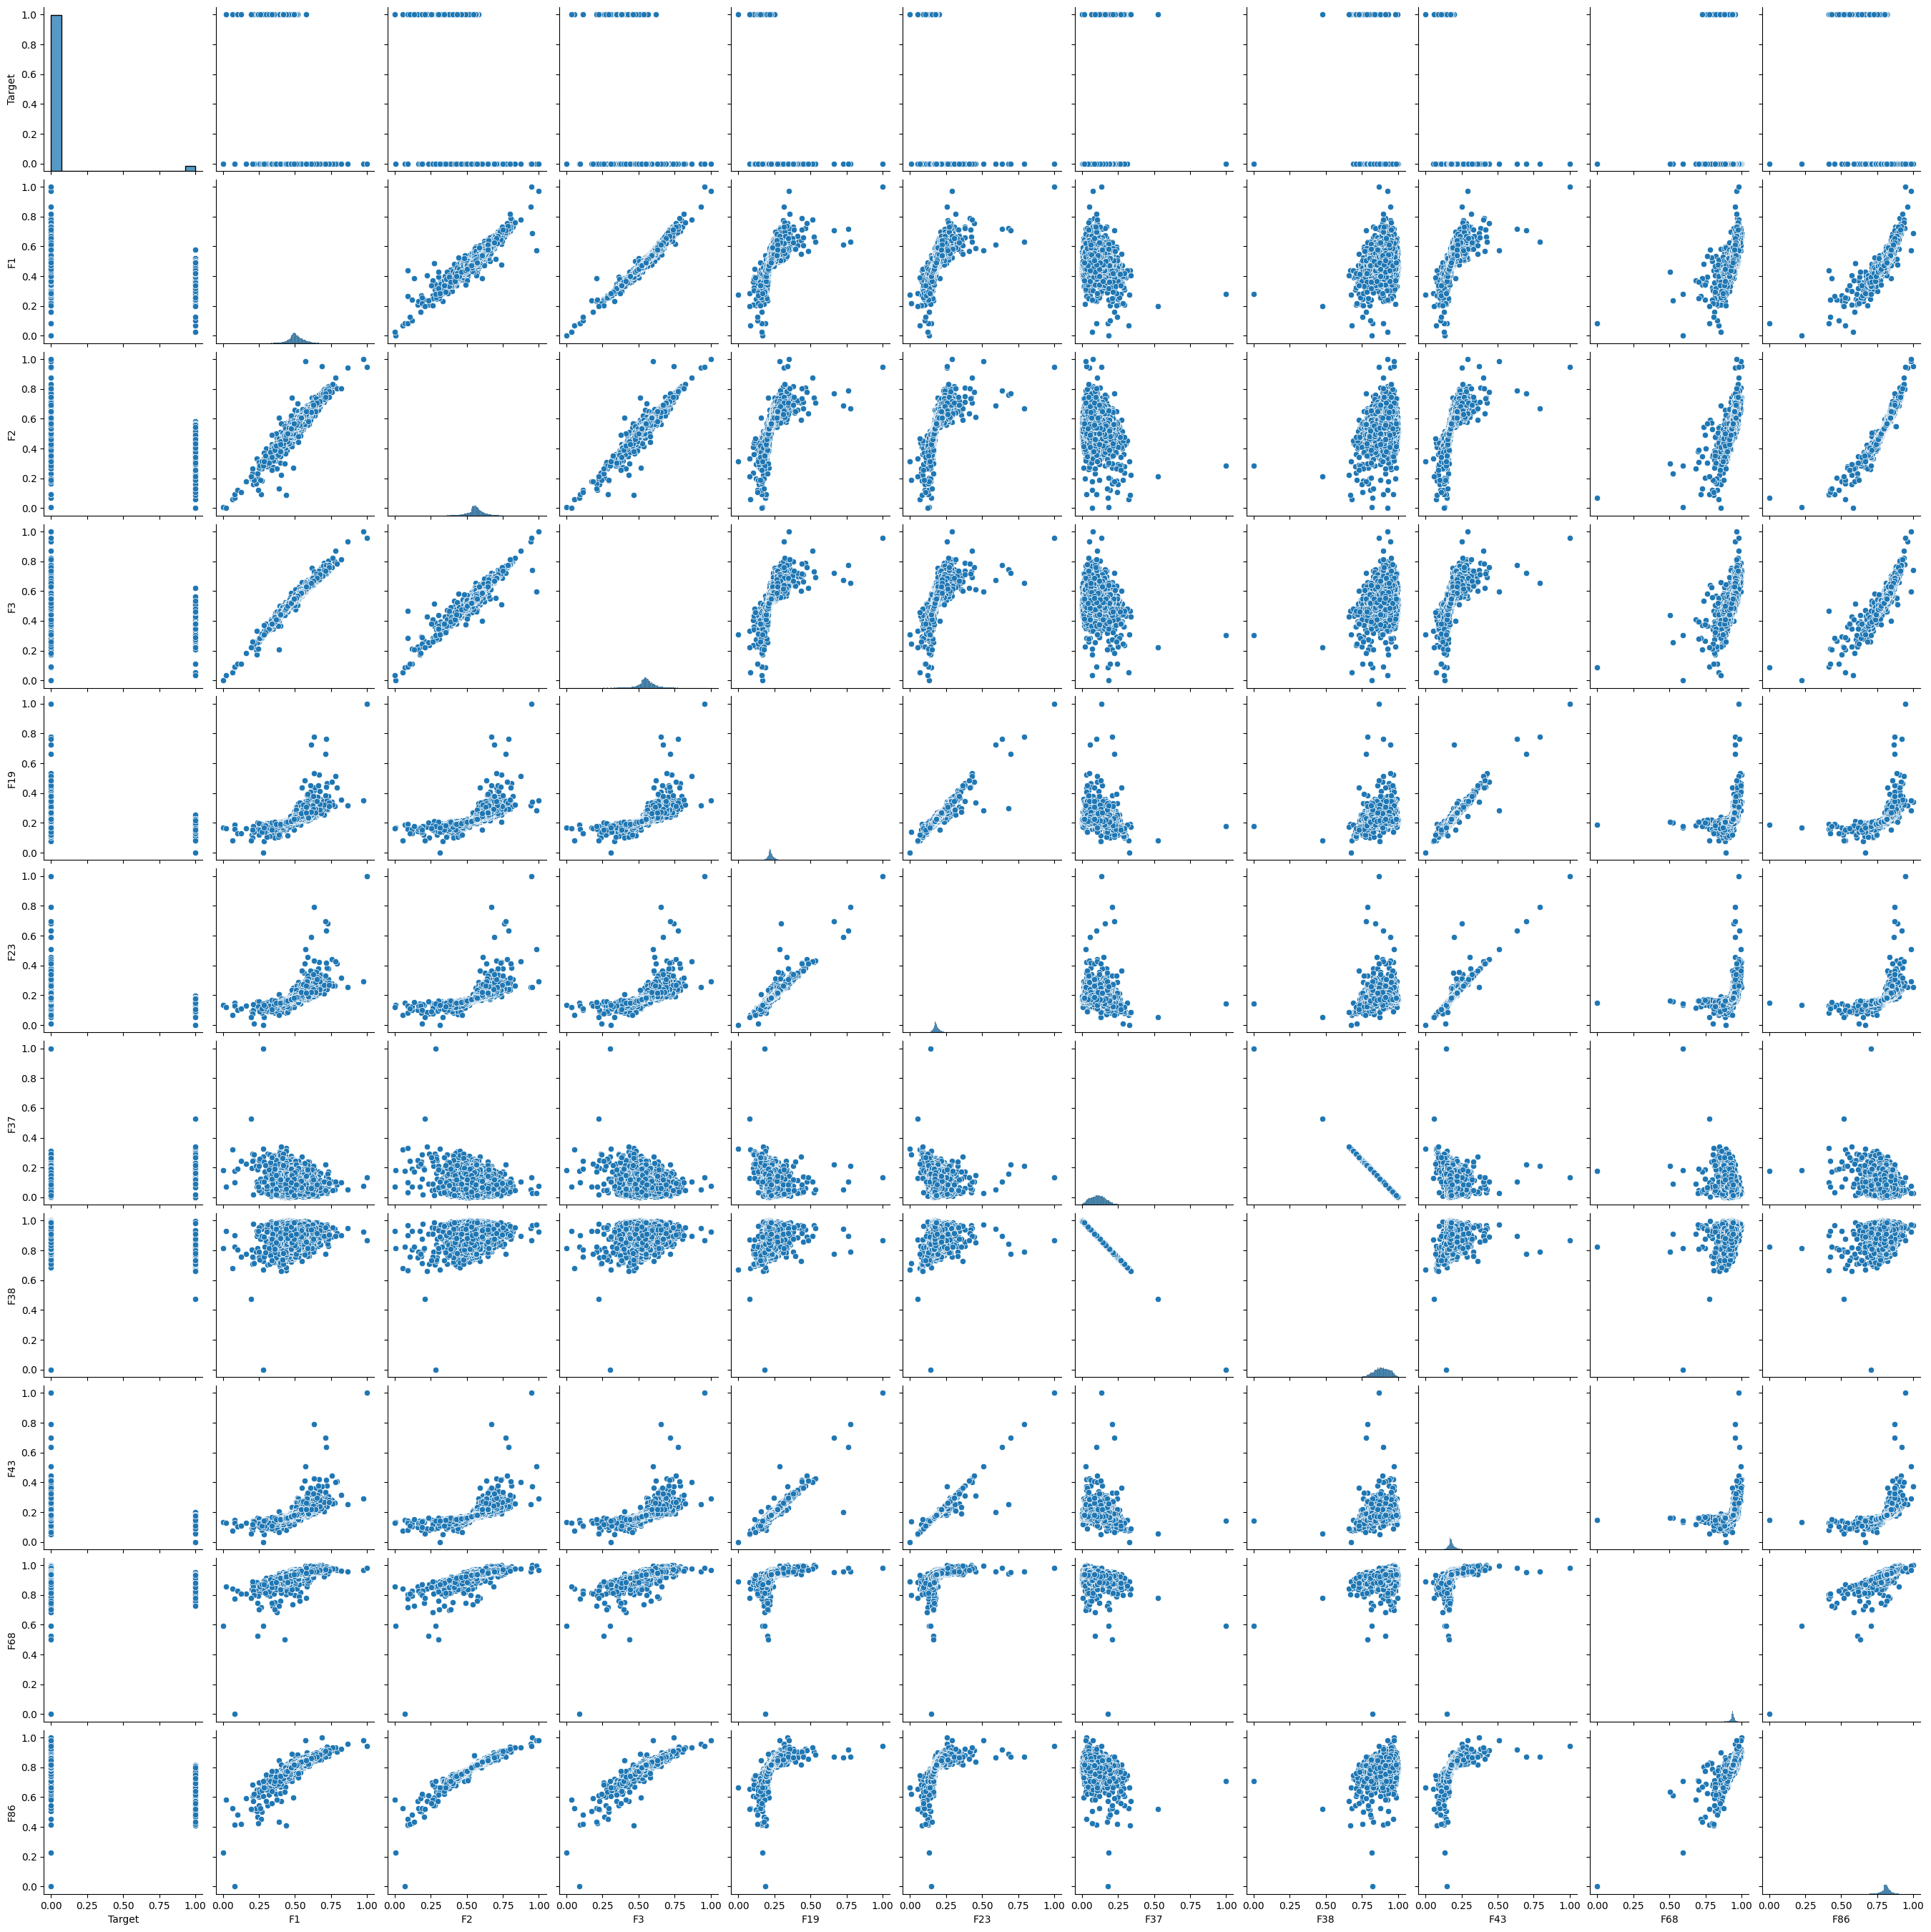

In [20]:
sns.pairplot(df[strong_corr.index])

### Distributions

array([[<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': 'F1'}>, <Axes: title={'center': 'F2'}>,
        <Axes: title={'center': 'F3'}>, <Axes: title={'center': 'F4'}>,
        <Axes: title={'center': 'F5'}>, <Axes: title={'center': 'F6'}>,
        <Axes: title={'center': 'F7'}>, <Axes: title={'center': 'F8'}>,
        <Axes: title={'center': 'F9'}>],
       [<Axes: title={'center': 'F10'}>, <Axes: title={'center': 'F11'}>,
        <Axes: title={'center': 'F12'}>, <Axes: title={'center': 'F13'}>,
        <Axes: title={'center': 'F14'}>, <Axes: title={'center': 'F15'}>,
        <Axes: title={'center': 'F16'}>, <Axes: title={'center': 'F17'}>,
        <Axes: title={'center': 'F18'}>, <Axes: title={'center': 'F19'}>],
       [<Axes: title={'center': 'F20'}>, <Axes: title={'center': 'F21'}>,
        <Axes: title={'center': 'F22'}>, <Axes: title={'center': 'F23'}>,
        <Axes: title={'center': 'F24'}>, <Axes: title={'center': 'F25'}>,
        <Axes: title={'center': 'F

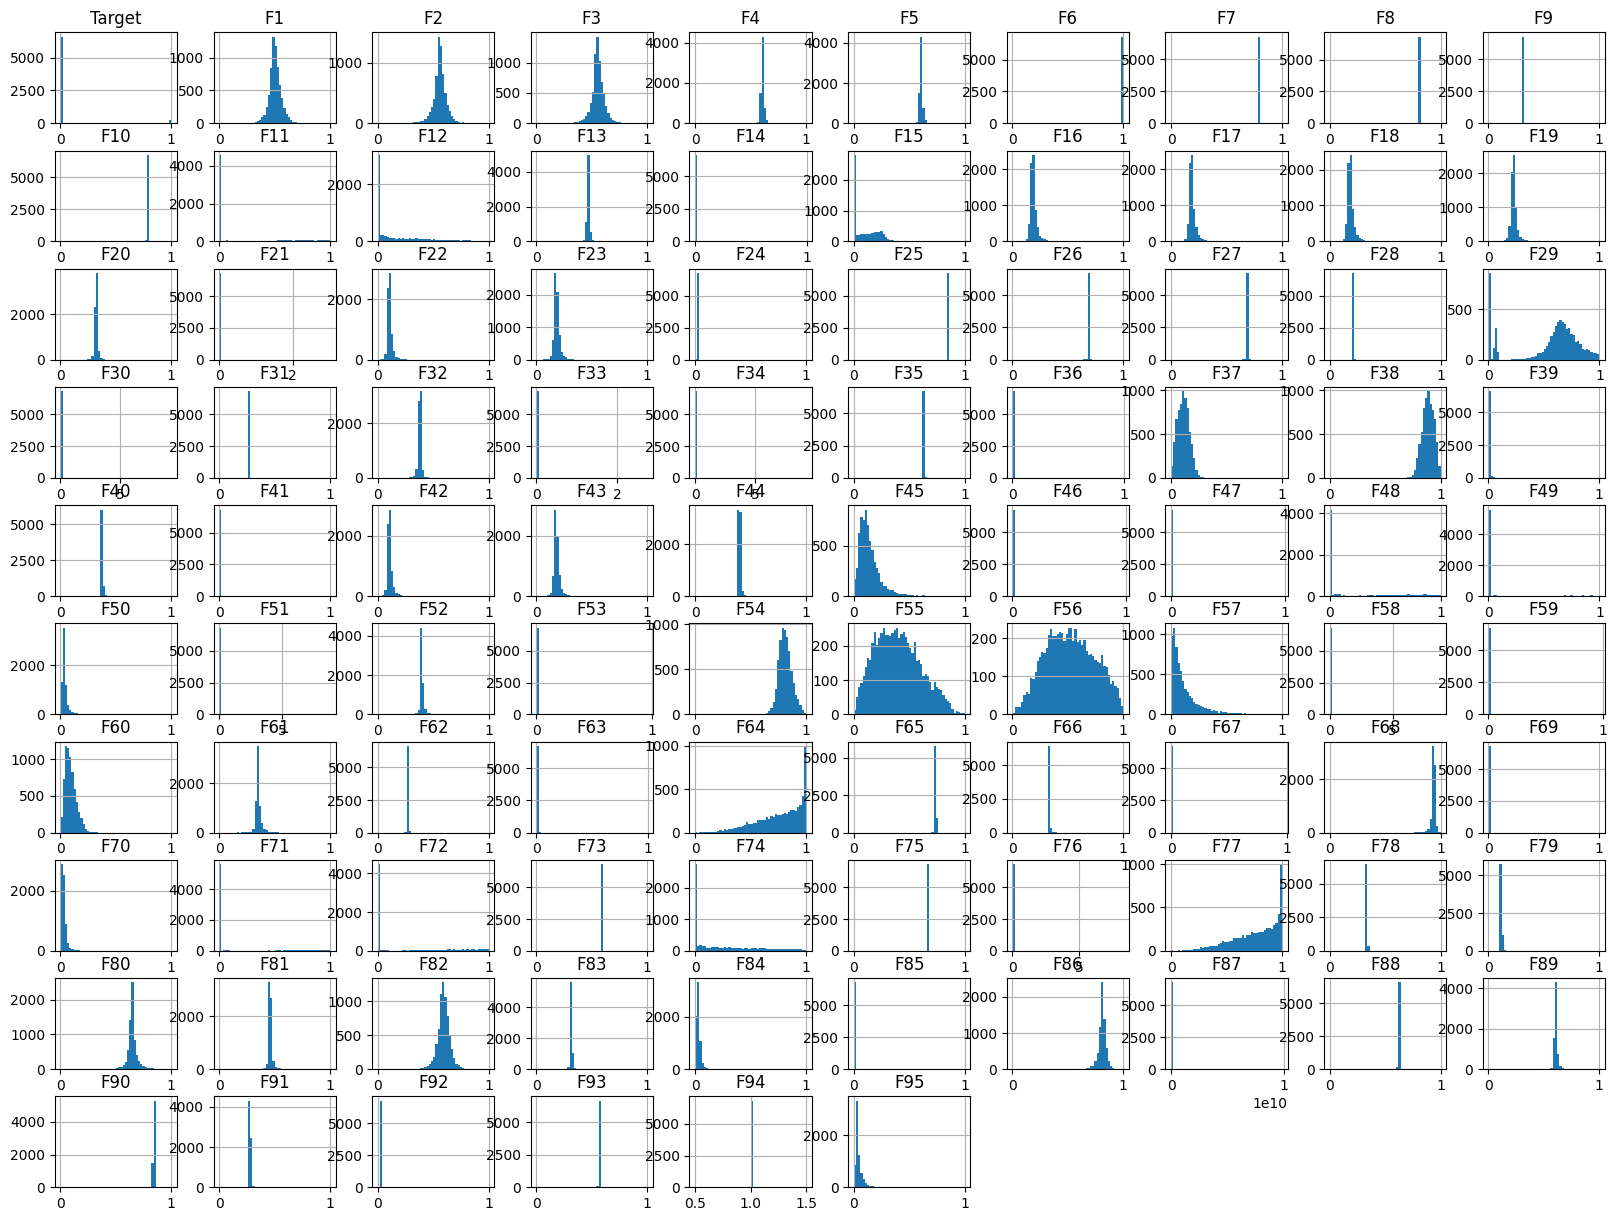

In [21]:
df.hist(bins=50, figsize=(20,15))

In [ ]:
df.head()

,Target,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68,F69,F70,F71,F72,F73,F74,F75,F76,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92,F93,F94,F95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.397925,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.015463,0.378497,0.021320,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.16

## Building the Model

### Train/Test Split

In [58]:
X = df.drop(labels=['Target'], axis=1)
y = df['Target']
print('Features: ', X.shape)
print('Target', y.shape)

Features:  (6819, 95)
Target (6819,)


In [ ]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68,F69,F70,F71,F72,F73,F74,F75,F76,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92,F93,F94,F95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.397925,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.015463,0.378497,0.021320,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.167502,0.167502,0.2

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##### Stratified Split

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [51]:
strat_train_features = strat_train_set.drop('Target', axis=1)
strat_train_labels = strat_train_set['Target']
strat_test_features = strat_test_set.drop('Target', axis=1)
strat_test_labels = strat_test_set['Target']

In [45]:
# strat_train_features

In [46]:
# strat_train_labels

### Creating models
TODO: LogisticRegression, RandomForest, SVM, Naive Bayes, DecisitionTrees will be used. 

#### 1. Logistic Regression
THe 'liblinear' solver will be used and max_iter=176 since 175 raise convergence warning (accuracy is not affected).

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 0, max_iter=176, solver='liblinear')
# logit.fit(X_train, y_train)

In [52]:
logit.fit(strat_train_features, strat_train_labels)

LogisticRegression(max_iter=176, random_state=0, solver='liblinear')

##### Cross-Validation

In [64]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(logit, X_train, y_train, scoring="accuracy", cv=10)
print(accuracies)

[0.95703125 0.9609375  0.95703125 0.95898438 0.962818   0.95303327
 0.962818   0.962818   0.96477495 0.95694716]


## Comparing the models performances

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logit.predict(strat_test_features)
cm = confusion_matrix(strat_test_labels, y_pred)
print(cm)
accuracy_score(strat_test_labels, y_pred)

[[1309   11]
 [  44    0]]


0.9596774193548387

In [60]:
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)
accuracy_score(y_test, y_pred)

[[1642   11]
 [  52    0]]


0.963049853372434

### Fine-Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#  scoring='neg_mean_squared_error',
# return_train_score=True)
# grid_search.fit(housing_prepared, housing_labels)


In [ ]:
grid_search.best_params_
grid_search.best_estimator_
grid_search.cv_results_


## Save the model

## Final Evaluation on The test Set

In [ ]:
from sklearn.externals import joblib
joblib.dump(logit, "logit.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

TODO
* Transformation Pipeline